In [19]:
import circle_detection_functions
import picture_creator

import numpy as np

import matplotlib.pyplot as plt
from functools import partial

In [20]:
generator_function = partial(picture_creator.generate_random_picure)
detecter_function = partial(circle_detection_functions.get_yellow_circles_cv2)

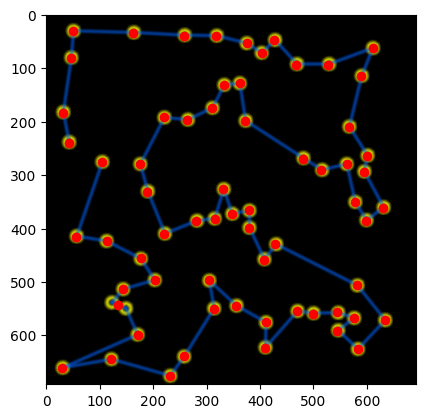

In [21]:
image, positions = generator_function()
detected_positions = detecter_function(image)

#Plot the detected yellow circles
plt.imshow(image)
for pos in detected_positions:
    plt.plot(pos[0], pos[1], 'ro')

In [22]:
def min_dist_circles(true_points, point):
    min_dist = np.linalg.norm(true_points[0]-point)
    point_nr = 0
    for i in range(1,len(true_points)):
        if np.linalg.norm(true_points[i] - point) < min_dist:
            min_dist = np.linalg.norm(true_points[i] - point)
            point_nr = i
    return min_dist , point_nr

In [23]:
max_dist = 0
sum_dist = 0
all_points = [False for i in range(len(positions))]
for i in range(len(detected_positions)):
    dist, nr = min_dist_circles(positions, detected_positions[i])
    if dist > max_dist:
        max_dist = dist
    sum_dist += dist
    all_points[nr] = True

print("number of true circles / number of detected circles: ", len(positions)/len(detected_positions))
print("Maximal distance between detected and true circles: ", max_dist)
print("Average distance between detected and true circles: ", sum_dist/len(detected_positions))
if all(all_points):
    print("All circles detected")
else:
    print("Not all circles detected")

number of true circles / number of detected circles:  1.0153846153846153
Maximal distance between detected and true circles:  13.0
Average distance between detected and true circles:  1.101960261507223
Not all circles detected


In [24]:
for _ in range(20):
    image, positions = generator_function()
    detected_positions = detecter_function(image)
    max_dist = 0
    sum_dist = 0
    all_points = [False for i in range(len(positions))]
    for i in range(len(detected_positions)):
        dist, nr = min_dist_circles(positions, detected_positions[i])
        if dist > max_dist:
            max_dist = dist
        sum_dist += dist
        all_points[nr] = True

    print("{:.2f}  {:.2f}  {:.2f}  ".format(len(positions)/len(detected_positions),max_dist,sum_dist/len(detected_positions)),all(all_points))

1.02  13.45  1.16   False
1.00  1.41  0.86   True
1.00  1.41  0.89   True
1.00  1.41  0.87   True
1.01  13.89  1.03   False
1.00  1.41  0.74   True
1.00  1.41  0.98   True
1.00  1.41  0.82   True
1.03  13.89  1.24   False
1.00  1.41  0.86   True
1.02  13.93  1.22   False
1.02  13.89  1.11   False
1.00  1.41  0.88   True
1.02  13.00  1.05   False
1.00  1.41  0.86   True
1.05  14.87  1.64   False
1.00  1.41  0.85   True
1.00  1.41  0.80   True
1.00  1.41  0.92   True
1.00  1.41  0.91   True
